In [1]:
from mylab.ana.miniscope.context_exposure.Canamini import *
from mylab.ana.miniscope.context_exposure.ana_funtions import SingleCell_MeanFr_in_SingleTrial_along_Placebin,plot_MeanFr_along_Placebin
from mylab.ana.miniscope.context_exposure.Mpca import *
import numpy as np
import re,os,copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
session = r"\\10.10.47.163\Data_archive\qiushou\Sessions\201033_part1_day20200723_aim_ce.pkl"

## plot single cell example

result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Context' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUN::add_behave_forward_context
'behave_forward_context' was added according to Enter_ctx.
FUN::add_behave_choice_side
'behave_choice_side' was added.
FUN::add_behave_reward
'behave_reward' was added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\mylab\ana\miniscope\context_exposure\ana_funtions.py:333: RuntimeWarning: Mean of empty slice
  matrix_mean = np.nanmean(matrix,axis=1)
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\mylab\ana\miniscope\context_exposure\ana_funtions.py:334: RuntimeWarning: Mean of empty slice
  matrix_speed_mean = np.nanmean(matrix_speed,axis=1)
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\mylab\ana\miniscope\context_exposure\ana_funtions.py:345: RuntimeWarning: Mean of empty slice
  matrix_standarization_mean = np.nanmean(matrix_standarization,axis=1)
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\mylab\ana\miniscope\context_exposure\ana_funtions.py:333: RuntimeWarning: Mean of empty slice
  matrix_mean = np.nanmean(matrix,axis=1)
C:\Users\Sabri\Anaconda3\envs\mylab\lib\

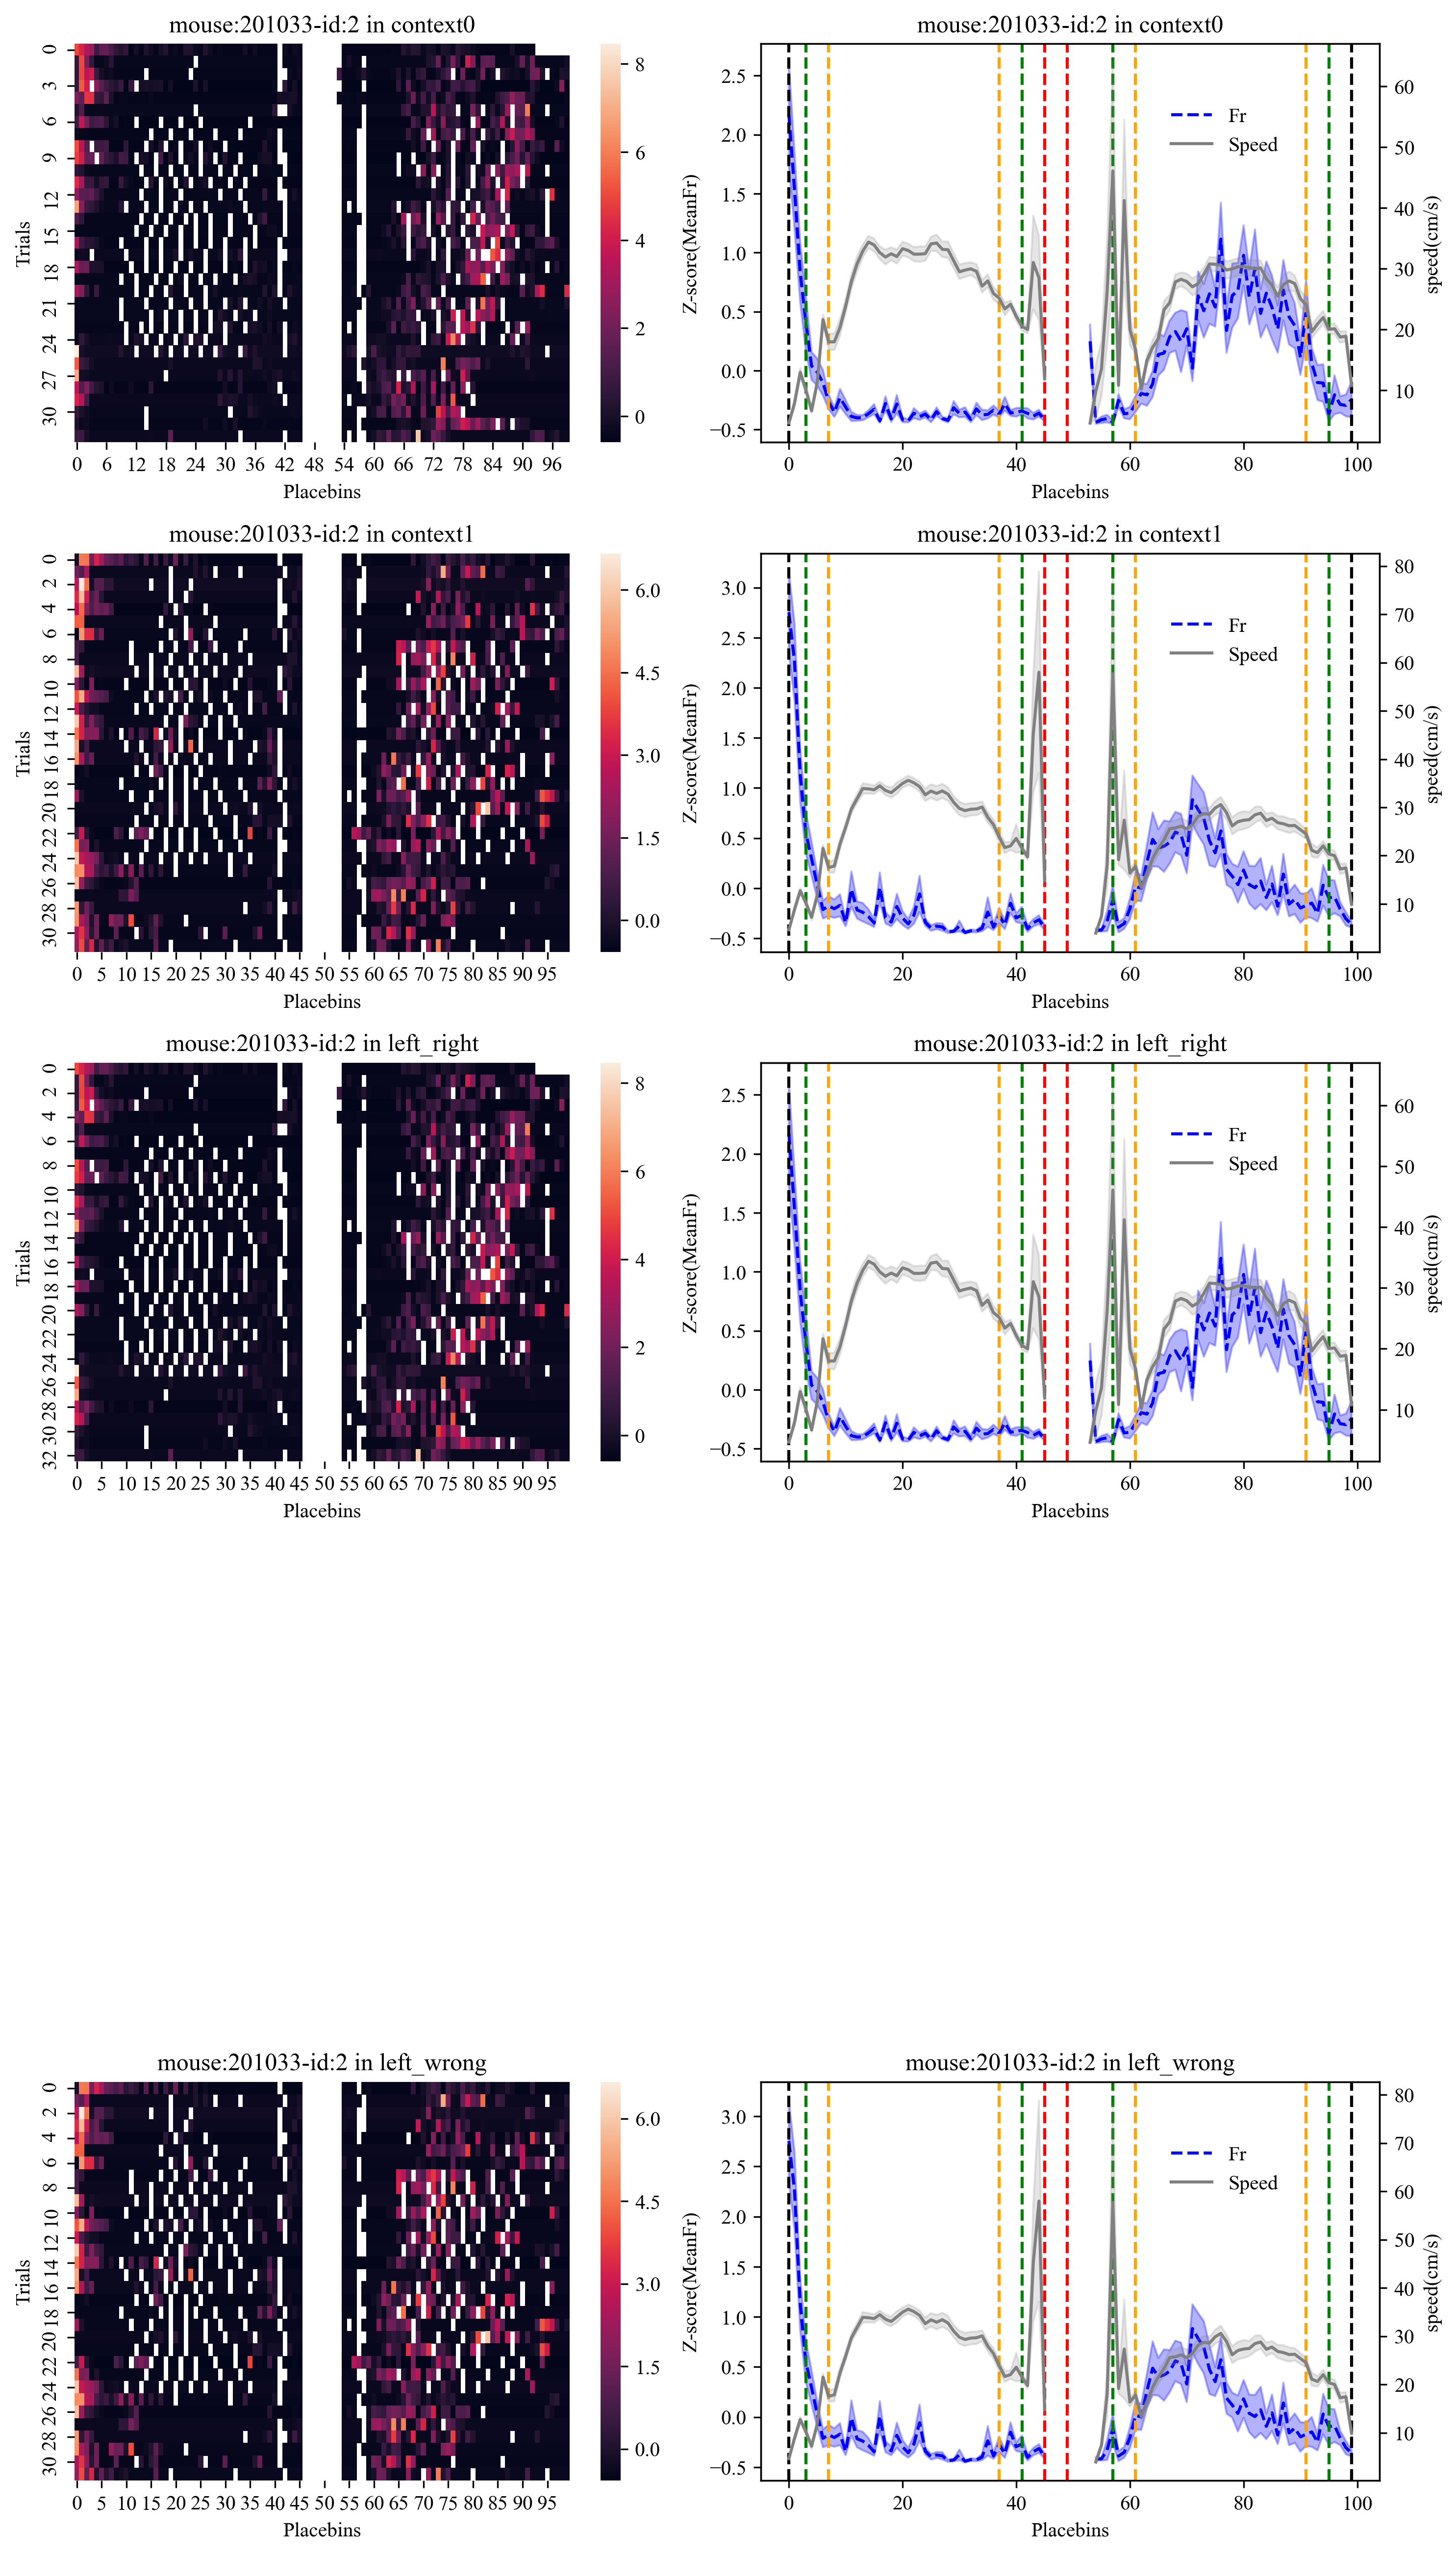

In [3]:
s = build_session(session)

s.add_Trial_Num_Process()
s.add_Context()
s.add_alltrack_placebin_num(place_bin_nums=[4,4,30,4,4,4])
s.add_Body_speed(scale=0.33)

s.add_behave_forward_context(according="Enter_ctx")
s.add_behave_choice_side()
s.add_behave_reward()

Context_Matrix_info = SingleCell_MeanFr_in_SingleTrial_along_Placebin(s
    ,"S_dff"
    ,Body_speed=3)

plot_MeanFr_along_Placebin(Context_Matrix_info=Context_Matrix_info
                           ,idx=2,save=False,show=True)


In [11]:
from plotMeanFr import plot_single_cell_example

ImportError: cannot import name 'plot_single_cell_example' from 'plotMeanFr' (\\10.10.47.163\Data_archive\qiushou\Linear_Track_developing\core\plotMeanFr.py)

In [1]:
from Cdatabase import DataBase,CellType
db = DataBase()

In [2]:
sessions_1 = db.index_sessions(part=1)
sessions_1[0]

'\\\\10.10.47.163\\Data_archive\\qiushou\\Sessions\\201033_part1_day20200721_aim_ce.pkl'

In [3]:
plot_single_cell_example(sessions_1[0])

NameError: name 'plot_single_cell_example' is not defined

## plot speed and direction

FUNC::SingleCell_trace_in_SingleTrial
trim_index was initialed by Trial_Num>=0
trim_df : df was trimmed.
screen df according to given contexts
screen df according to given place bins
screen df according to given tirals


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Sabr

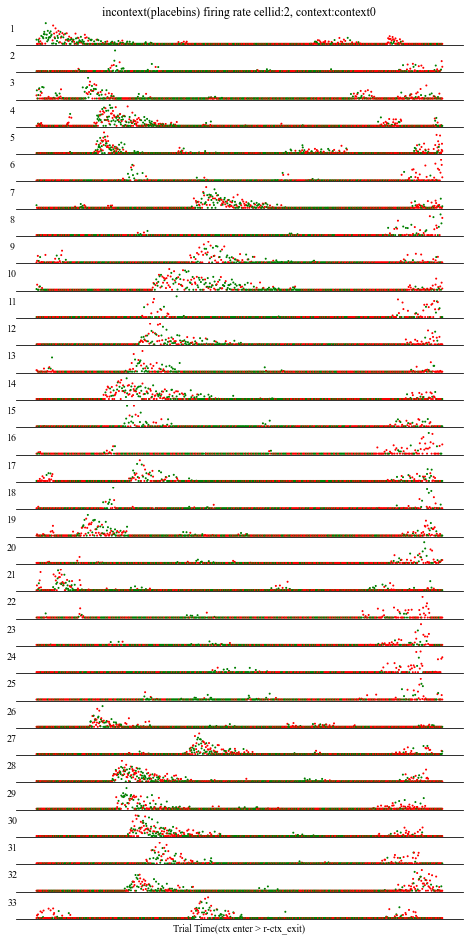

In [10]:
from mylab.ana.miniscope.context_exposure.ana_funtions import SingleCell_trace_in_SingleTrial,plot_trace_with_running_direction

Context_dataframe_info = SingleCell_trace_in_SingleTrial(s)

Context_dataframe_info.keys()

plot = plot_trace_with_running_direction(Context_dataframe_info)

plot(2,"context0")

## dPCA

In [30]:
from Cdatabase import *
from addinfo2celltype import *
from mylab.Functions import *

In [32]:
db = DataBase()

In [54]:
context_map = db.context_map
context_map[context_map["part"]==1]

,Unnamed: 0,mouse_id,part,aim,index,ctx_0,ctx_1,ctx_2,rule_0,rule_1,rule_2
0,249,206553,1,ce,20200721-142122,A,B,C,left,left,left
1,176,206551,1,ce,20200721-150926,A,B,C,left,left,left
2,116,206548,1,ce,20200721-155255,A,B,C,left,left,left
3,210,206552,1,ce,20200721-162523,A,B,C,left,left,left
4,146,206550,1,ce,20200721-170601,A,B,C,left,left,left
5,62,2020061,1,ce,20200721-183836,A,B,C,left,left,left
6,43,201034,1,ce,20200721-191521,A,B,C,left,left,left
7,0,201033,1,ce,20200721-201748,A,B,C,left,left,left
8,93,206534,1,ce,20200721-213035,A,B,C,left,left,left
9,147,206550,1,ce,20200722-102844,A,B,C,left,left,left


rdcells: try body_speed> 3cm/s
result is loaded
only cells ['201034_0', '201034_10', '201034_14', '201034_15', '201034_17', '201034_22', '201034_25', '201034_26', '201034_63', '201034_64', '201034_127', '201034_129', '201034_136', '201034_140', '201034_148', '201034_165', '201034_166', '201034_195', '201034_212', '201034_215', '201034_220', '201034_224', '201034_226', '201034_229', '201034_231', '201034_232', '201034_233', '201034_247', '201034_249', '201034_250', '201034_251', '201034_256', '201034_257', '201034_258', '201034_301', '201034_304', '201034_305', '201034_306', '201034_309', '201034_312', '201034_314', '201034_316', '201034_321', '201034_322', '201034_324', '201034_326', '201034_341', '201034_342', '201034_353', '201034_354', '201034_355', '201034_367', '201034_371', '201034_405', '201034_1', '201034_2', '201034_5', '201034_6', '201034_7', '201034_9', '201034_11', '201034_13', '201034_20', '201034_27', '201034_34', '201034_54', '201034_57', '201034_61', '201034_62', '20103

C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\mylab\ana\miniscope\context_exposure\Mpca.py:275: RuntimeWarning: Mean of empty slice
  #先求没有np.nan的均值，然后再将np.nan替换为0


You chose to determine the regularization parameter automatically. This can
                    take substantial time and grows linearly with the number of crossvalidation
                    folds. The latter can be set by changing self.n_trials (default = 3). Similarly,
                    use self.protect to set the list of axes that are not supposed to get to get shuffled
                    (e.g. upon splitting the data into test- and training, time-points should always
                    be drawn from the same trial, i.e. self.protect = ['t']). This can significantly
                    speed up the code.
Start optimizing regularization.
Starting trial  1 / 3
Starting trial  2 / 3
Starting trial  3 / 3
Optimized regularization, optimal lambda =  0.004743480741674971
Regularization will be fixed; to compute the optimal                    parameter again on the next fit, please                    set opt_regularizer_flag to True.
Compute score of data:  . . . . . . . . . . Finishe

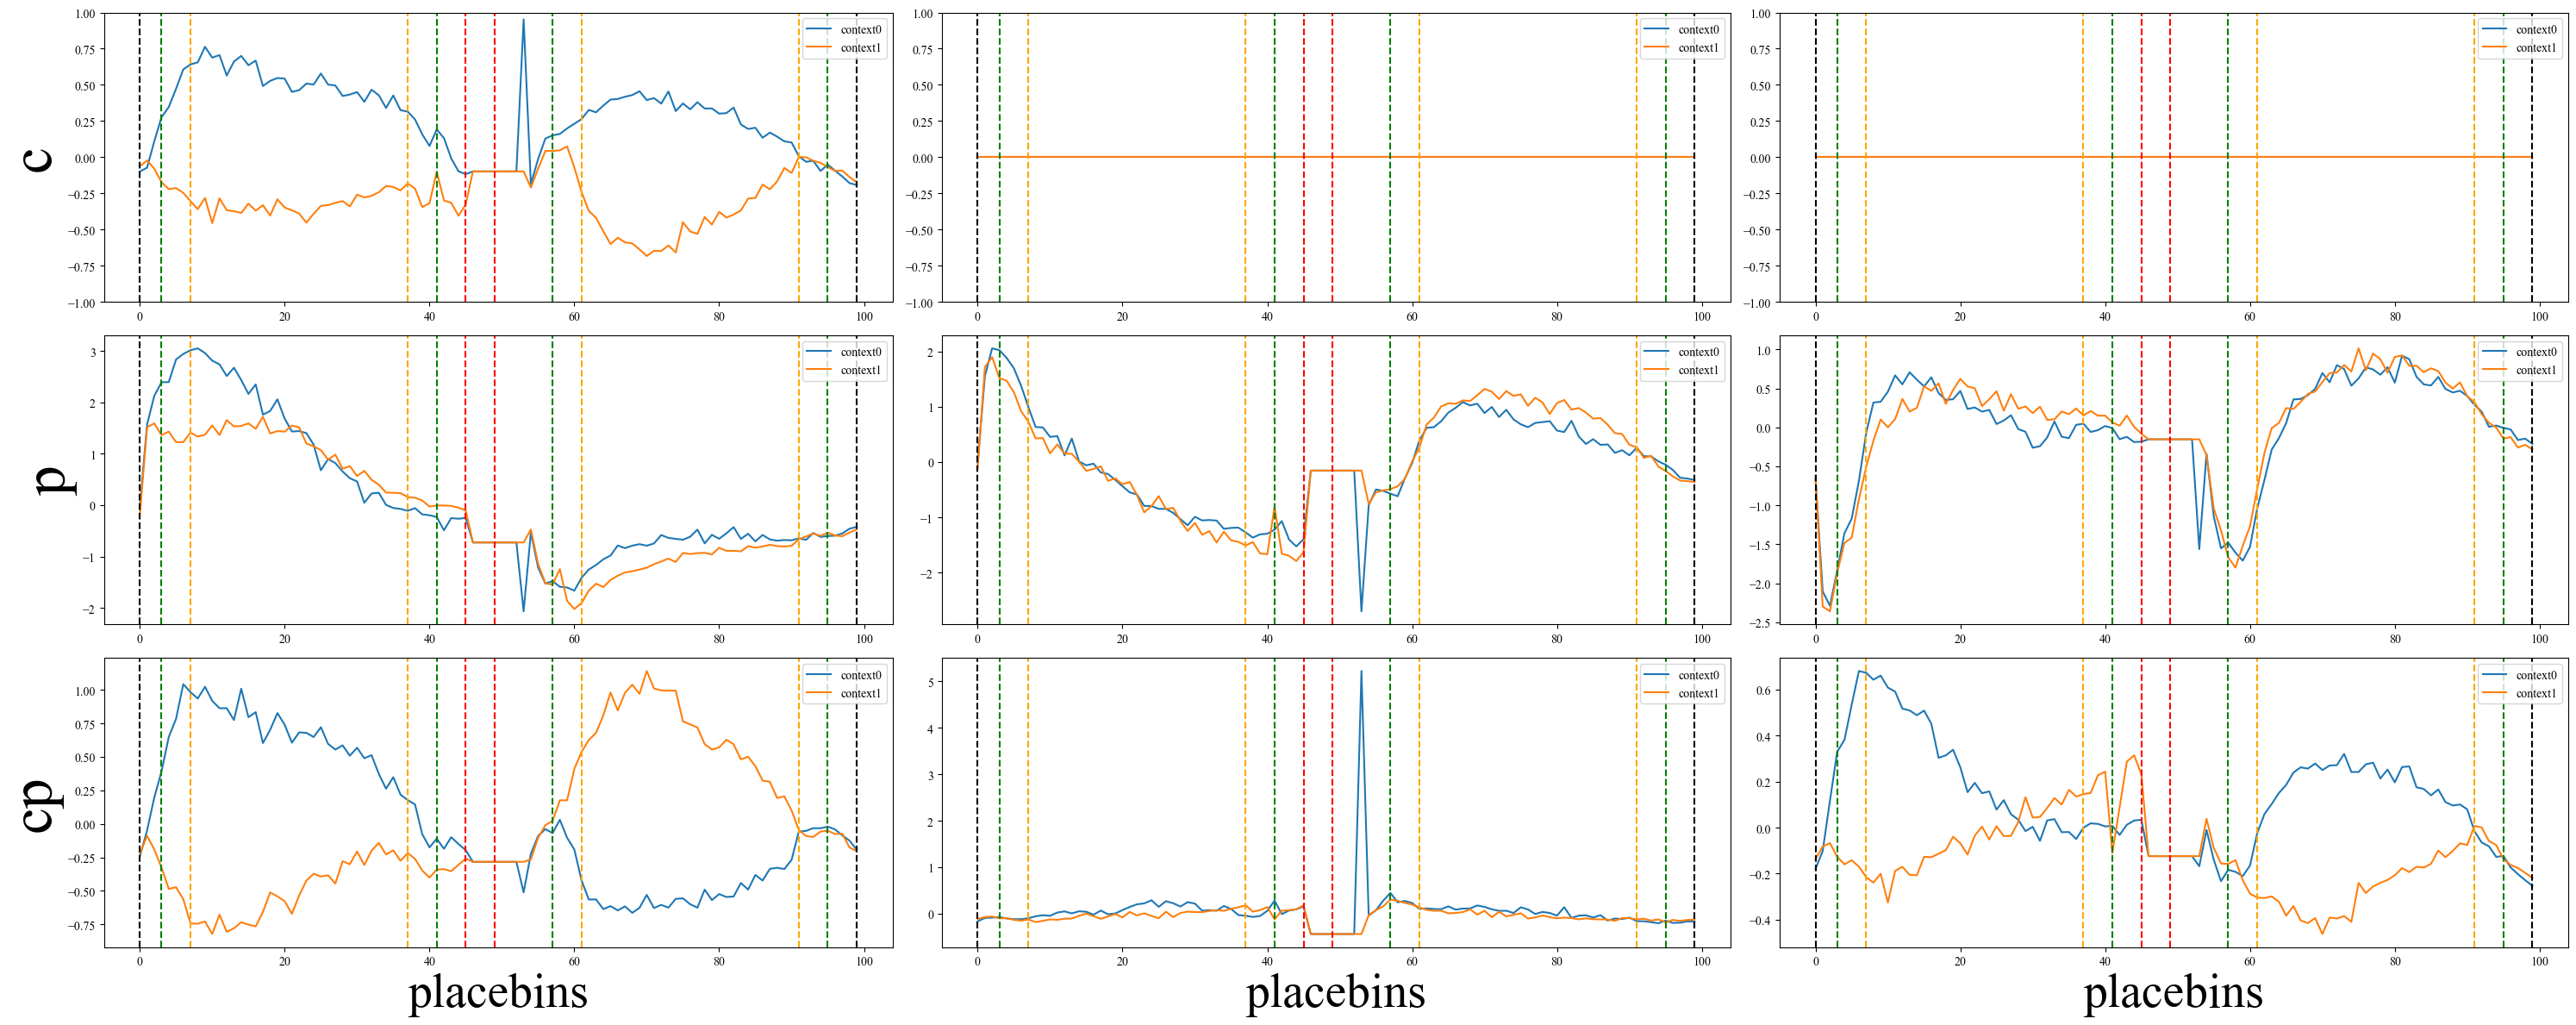

In [43]:
c = CellType(db.index_celltypes(mouse_id="201034",part=1,day=20200723,aim="ce")[0])
contextcell_ids, rdcell_ids,pccell_ids,total_cell_num = c.specific_ids()
cellids = spread(contextcell_ids.values())
cells  = [i for i in c.csi().index if i not in cellids ]
s2 = build_session(c.find_session())
s2.select_cellids(cellids)

c = CellType(db.index_celltypes(mouse_id="201033",part=1,day=20200723,aim="ce")[0])
contextcell_ids, rdcell_ids,pccell_ids,total_cell_num = c.specific_ids()
cellids = spread(contextcell_ids.values())
cells  = [i for i in c.csi().index if i not in cellids ]
s1 = build_session(c.find_session())
s1.select_cellids(cellids)

R,trialR,labels = construct_dPCA_matrixs([s1,s2])

result_dPCA = demixed_pca(R,trialR,labels)

In [46]:
total = (np.sum(result_dPCA["dpca"].explained_variance_ratio_["c"])+np.sum(result_dPCA["dpca"].explained_variance_ratio_["p"])+np.sum(result_dPCA["dpca"].explained_variance_ratio_["cp"]))
total

0.13569549359447847

In [50]:
np.sum(result_dPCA["dpca"].explained_variance_ratio_["cp"])/total

0.408391906344978

## PCA

FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Context
'Context' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
'S_dff' is taken as original self.df
trim_df : df was trimmed.


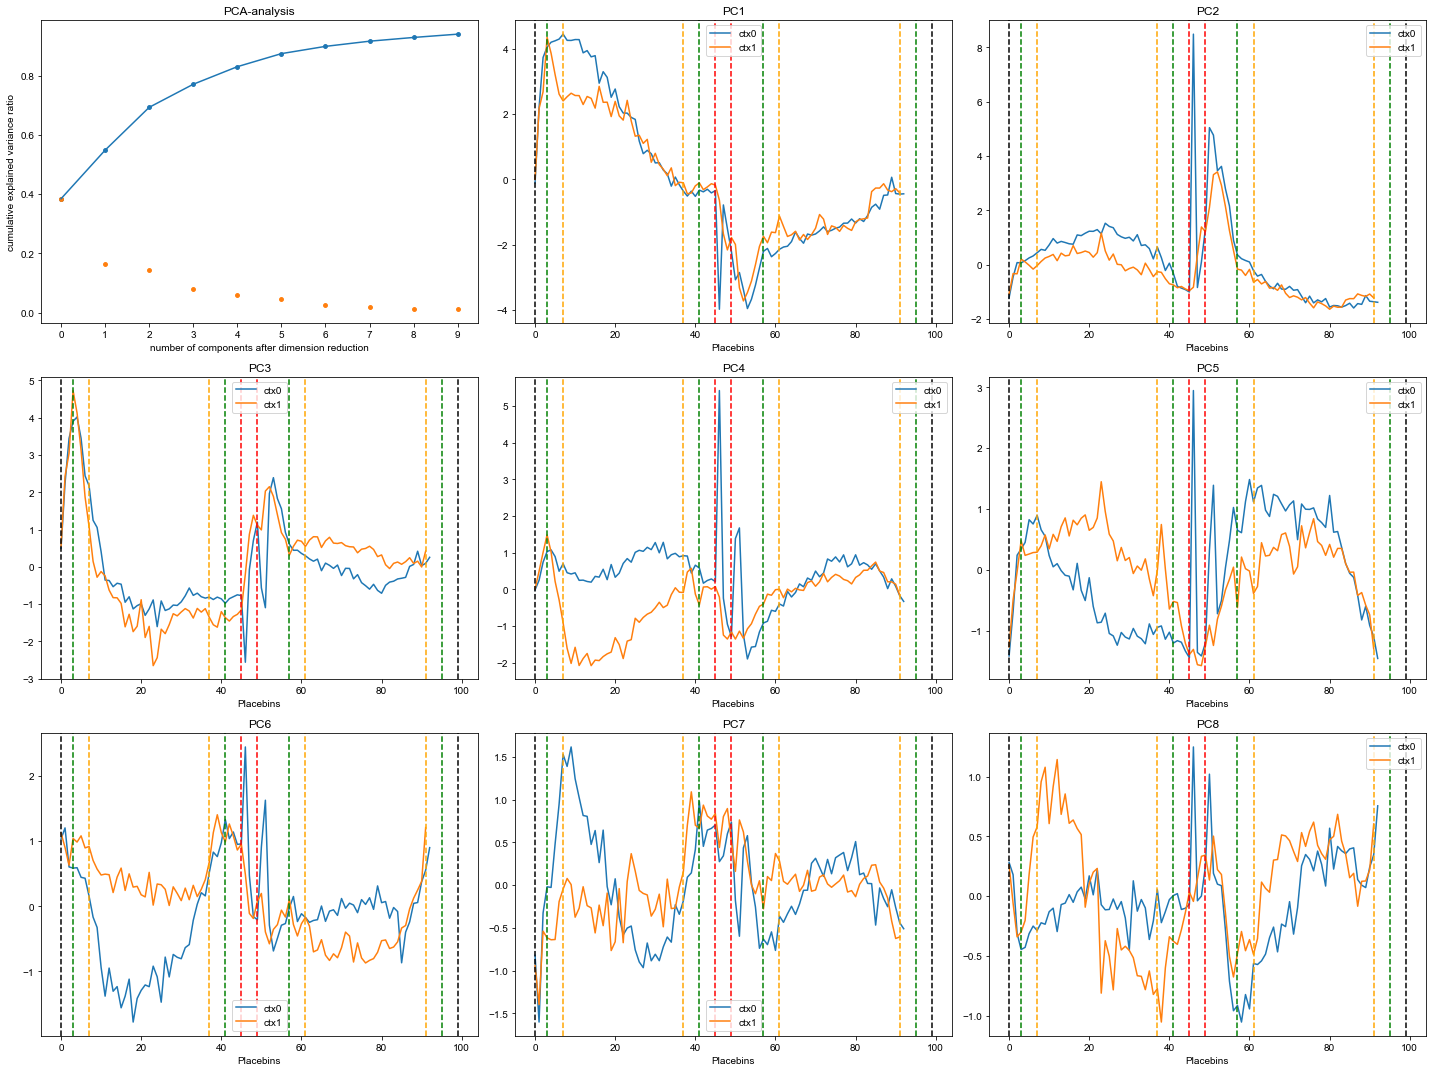

In [14]:
result_PCA = pca(construct_PCA_matrix(s1))